In [32]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

dimensions de X: (200, 2)
dimensions de y: (200, 1)


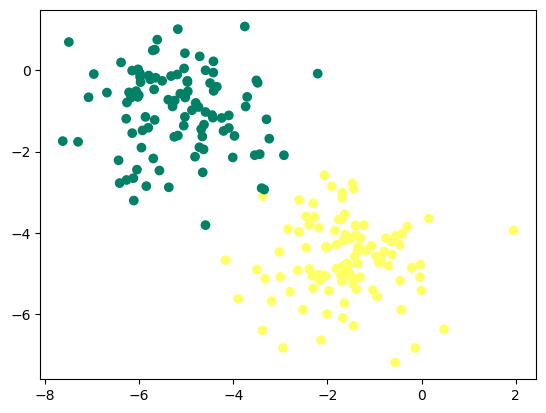

In [88]:
#créer des données pour une application de classification binaire
X, y = make_blobs(n_samples=200, n_features=2, centers=2, random_state=33)
y = y.reshape((y.shape[0], 1))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.show()

# Créer un model de classification binaire artificial neuron

In [89]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [90]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

In [91]:
def log_loss(A, y):
    return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

In [92]:
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)

In [93]:
def update(dW, db, W, b, learning_rate):
    W= W - learning_rate * dW
    b= b - learning_rate * db
    return (W,b)

In [94]:
def predict(X, W, b):
    A=model(X,W,b)
    return(A >= 0.5)

In [95]:
def artificiel_neuron(X,y,learning_rate=0.1, i_max=10000):
    W , b =initialisation(X)
    
    L=[]
    
    for i in range(i_max):
        A =model(X,W,b)
        L.append(log_loss(A,y))  
        dW, db = gradients(A, X, y)
        W,b= update(dW, db, W, b, learning_rate)
    
    y_pred = predict(X, W, b)
    
    #print(accuracy_score(y,y_pred))
    plt.plot(L)
    plt.show()
    return (W,b)

appliquer ce modèle sur les données

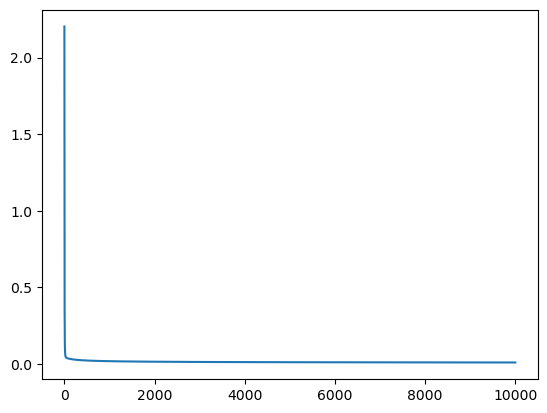

In [96]:
W,b = artificiel_neuron(X,y )

In [97]:
def predict1(X, W =W, b=b):
    A=model(X,W,b)
    print('la probabilité  que x = (',X[0],',',X[1],') soit de la classe Jaune est: ', round(A[0],2))

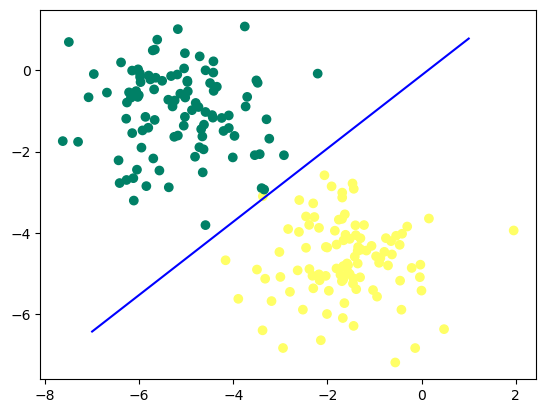

In [98]:
x0=np.linspace(-7,1,100)
x1= (- W[0] * x0 - b) / W[1]
plt.scatter(X[:,0],X[:,1], c=y, cmap='summer')
plt.plot(x0,x1,c='b')
plt.show()

In [99]:
new= np.array([1,0])
predict1(new)
#plt.scatter(new[0],new[1], c='r')

la probabilité  que x = ( 1 , 0 ) soit de la classe Jaune est:  0.96


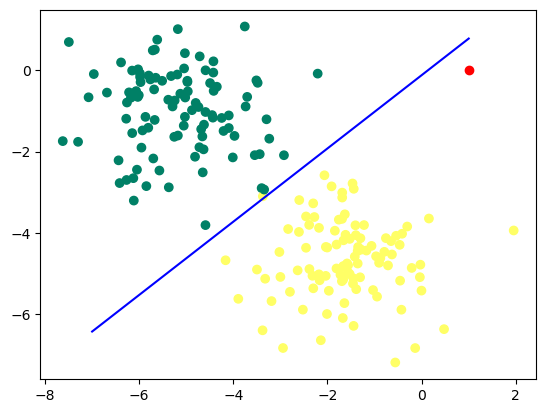

In [100]:
#visualiser graphiquement le nouveau point "new"
plt.scatter(new[0],new[1], c='r')


x0=np.linspace(-7,1,100)
x1= (- W[0] * x0 - b) / W[1]
plt.scatter(X[:,0],X[:,1], c=y, cmap='summer')
plt.plot(x0,x1,c='b')
plt.show()